# DATA PREPARATION

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = "FactorsCardiovascular/heart_data.csv"
df = pd.read_csv(path)

In [3]:
df.head(20)

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [4]:
print(df.dtypes)

index            int64
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


In [5]:
ab=[]
for x in df["age"]:
    x1=x/365
    x1=round(x1)
    ab.append(x1)

df.insert(2,"AgeY",ab)

In [6]:
df

,index,id,AgeY,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,50,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,55,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,52,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,48,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,48,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,53,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,62,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,52,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,61,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [7]:
df_noid = df.iloc[:,[2,4,5,6,7,8,9,10,11,12,13,14]]

In [8]:
df_noid.describe()

,AgeY,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


dari

In [9]:
df_noid.corr()

,AgeY,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
AgeY,1.000000,-0.023017,-0.081456,0.053661,0.020793,0.017754,0.154386,0.098596,-0.047884,-0.029918,-0.009819,0.237749
gender,-0.023017,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081456,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053661,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020793,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017754,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154386,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098596,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047884,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029918,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


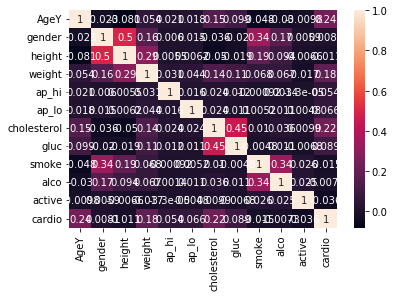

In [10]:
import matplotlib.pyplot as mp
import seaborn as sns

dataplot = sns.heatmap(df_noid.corr(), annot=True)
dataplot

In [11]:
df_noid.groupby('AgeY')['cardio'].mean()

AgeY
30    0.000000
39    0.222494
40    0.231111
41    0.271540
42    0.293064
43    0.388406
44    0.358125
45    0.381770
46    0.401015
47    0.462865
48    0.468065
49    0.443815
50    0.406114
51    0.436202
52    0.471620
53    0.471926
54    0.493153
55    0.544059
56    0.542364
57    0.549587
58    0.565065
59    0.567528
60    0.602196
61    0.649468
62    0.671676
63    0.713583
64    0.716071
65    0.687500
Name: cardio, dtype: float64

In [12]:
df_noid.groupby(pd.cut(df_noid['weight'], bins=range(int(df_noid['weight'].min()), int(df_noid['weight'].max()), 20)))['cardio'].mean()

weight
(10, 30]      0.444444
(30, 50]      0.286198
(50, 70]      0.425997
(70, 90]      0.541741
(90, 110]     0.657702
(110, 130]    0.706220
(130, 150]    0.804196
(150, 170]    0.590909
(170, 190]    0.769231
Name: cardio, dtype: float64

In [13]:
df_noid.groupby('cholesterol')['cardio'].mean()

cholesterol
1    0.440107
2    0.602157
3    0.765435
Name: cardio, dtype: float64

In [14]:
df_noid.groupby('smoke')['cardio'].mean()

smoke
0    0.502107
1    0.474793
Name: cardio, dtype: float64

In [15]:
df_noid['weight'].min()

10.0

In [16]:
risk = []
for i, row in df_noid.iterrows():
    score = 0
    if row['AgeY'] > 53.338686:
        score += 1
    if row['weight'] > 74.205690:
        score += 1
    if row['cholesterol'] > 1.366871:
        score += 1
    risk.append(score)
    
df_noid.insert(11,"risk",risk)


In [17]:
df_noid

,AgeY,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,risk,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0,0
1,55,1,156,85.0,140,90,3,1,0,0,1,3,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,1,0
69996,62,1,158,126.0,140,90,2,2,0,0,1,3,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,2,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,1


In [18]:
df_noid.corr()

,AgeY,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,risk,cardio
AgeY,1.000000,-0.023017,-0.081456,0.053661,0.020793,0.017754,0.154386,0.098596,-0.047884,-0.029918,-0.009819,0.559477,0.237749
gender,-0.023017,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.048866,0.008109
height,-0.081456,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,0.068674,-0.010821
weight,0.053661,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.518782,0.181660
ap_hi,0.020793,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.035799,0.054475
ap_lo,0.017754,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.037169,0.065719
cholesterol,0.154386,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.589289,0.221147
gluc,0.098596,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.279460,0.089307
smoke,-0.047884,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,0.020048,-0.015486
alco,-0.029918,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,0.038430,-0.007330


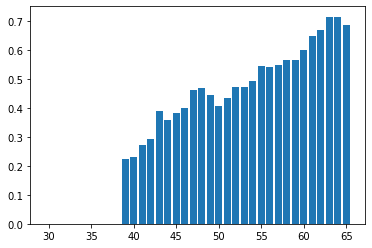

In [45]:
import matplotlib.pyplot as plt

agey_means = df_noid.groupby('AgeY')['cardio'].mean()
plt.bar(agey_means.index, agey_means)
plt.show()

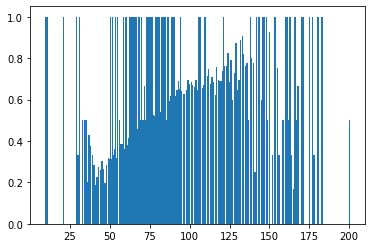

In [51]:
import matplotlib.pyplot as plt

weight_means = df_noid.groupby('weight')['cardio'].mean()
plt.bar(weight_means.index, weight_means)
plt.show()

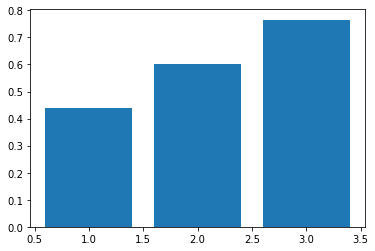

In [37]:
import matplotlib.pyplot as plt

cho_means = df_noid.groupby('cholesterol')['cardio'].mean()
plt.bar(cho_means.index, cho_means)
plt.show()

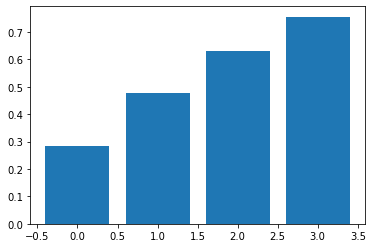

In [38]:
import matplotlib.pyplot as plt

risk_means = df_noid.groupby('risk')['cardio'].mean()
plt.bar(risk_means.index, risk_means)
plt.show()

In [40]:
counts = df_noid['weight'].value_counts()

# use boolean indexing to select and drop rows with a count of 1
df_clear = df_noid[~df_noid['weight'].isin(counts[counts == 1].index)]

print(df_clear)

       AgeY  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0        50       2     168    62.0    110     80            1     1      0   
1        55       1     156    85.0    140     90            3     1      0   
2        52       1     165    64.0    130     70            3     1      0   
3        48       2     169    82.0    150    100            1     1      0   
4        48       1     156    56.0    100     60            1     1      0   
...     ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995    53       2     168    76.0    120     80            1     1      1   
69996    62       1     158   126.0    140     90            2     2      0   
69997    52       2     183   105.0    180     90            3     1      0   
69998    61       1     163    72.0    135     80            1     2      0   
69999    56       1     170    72.0    120     80            2     1      0   

       alco  active  risk  cardio  
0         0    

In [42]:
df_clear.corr()

,AgeY,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,risk,cardio
AgeY,1.000000,-0.022915,-0.081847,0.054038,0.020779,0.017929,0.154268,0.098619,-0.047648,-0.029610,-0.009878,0.559471,0.237849
gender,-0.022915,1.000000,0.499451,0.155970,0.006008,0.015422,-0.035892,-0.020642,0.338015,0.170746,0.005751,0.048970,0.008083
height,-0.081847,0.499451,1.000000,0.291889,0.005512,0.006369,-0.050501,-0.018906,0.188146,0.094293,-0.007226,0.068440,-0.011262
weight,0.054038,0.155970,0.291889,1.000000,0.030771,0.043425,0.141991,0.107122,0.068656,0.066987,-0.017292,0.519922,0.181817
ap_hi,0.020779,0.006008,0.005512,0.030771,1.000000,0.015988,0.023733,0.011833,-0.000916,0.001411,-0.000050,0.035754,0.054386
ap_lo,0.017929,0.015422,0.006369,0.043425,0.015988,1.000000,0.024055,0.010840,0.005360,0.010784,0.004922,0.037224,0.065366
cholesterol,0.154268,-0.035892,-0.050501,0.141991,0.023733,0.024055,1.000000,0.451685,0.010410,0.035860,0.009861,0.589213,0.221004
gluc,0.098619,-0.020642,-0.018906,0.107122,0.011833,0.010840,0.451685,1.000000,-0.004656,0.011192,-0.006803,0.279539,0.089284
smoke,-0.047648,0.338015,0.188146,0.068656,-0.000916,0.005360,0.010410,-0.004656,1.000000,0.339854,0.026257,0.020458,-0.015358
alco,-0.029610,0.170746,0.094293,0.066987,0.001411,0.010784,0.035860,0.011192,0.339854,1.000000,0.025690,0.038713,-0.007218


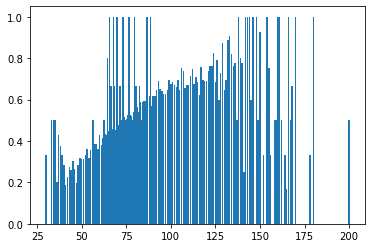